<a href="https://colab.research.google.com/github/Om301302/Productivity-Prediction-of-Garment-Employees/blob/main/Productivity_Prediction_of_Garment_Employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The productivity prediction of garment employees is a regrssion problem. A regression problem is a supervised machine learning problem where a continuous numerical value is predicted based on input features. We have a dataset of the following 15 attributes:

* date : Date in MM-DD-YYYY
* day : Day of the Week
* quarter : A portion of the month. A month was divided into four quarters
* department : Associated department with the instance
* team_no : Associated team number with the instance
* no_of_workers : Number of workers in each team
* no_of_style_change : Number of changes in the style of a particular product
* targeted_productivity : Targeted productivity set by the Authority for each team for each day.
* smv : Standard Minute Value, it is the allocated time for a task
* wip : Work in progress. Includes the number of unfinished items for products
* over_time : Represents the amount of overtime by each team in minutes
* incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* idle_time : The amount of time when the production was interrupted due to several reasons
* idle_men : The number of workers who were idle due to production interruption
* actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.inspection import permutation_importance


In [ ]:
#Load data from UCI's Productivity Prediction of Garment Employees Data Set
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv")

In [ ]:
#Display size of the dataset tuple of two values: (num of rows, num of columns)
dataset.shape

(1197, 15)

In [ ]:
#Display first few rows of the dataset
dataset.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [ ]:
#Display summary of the dataset including # of non-null values, data types, memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
#Display numerical summary of statistics about columns of the dataset such as:
#count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
#Display if there are any missing values in the dataset where value returns "Nan", "None"
dataset.isna().sum()

#The "wip" column for number of wip product items is missing 506 values.
#This means the dataset will require data cleaning to handle the missing values

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

<Axes: >

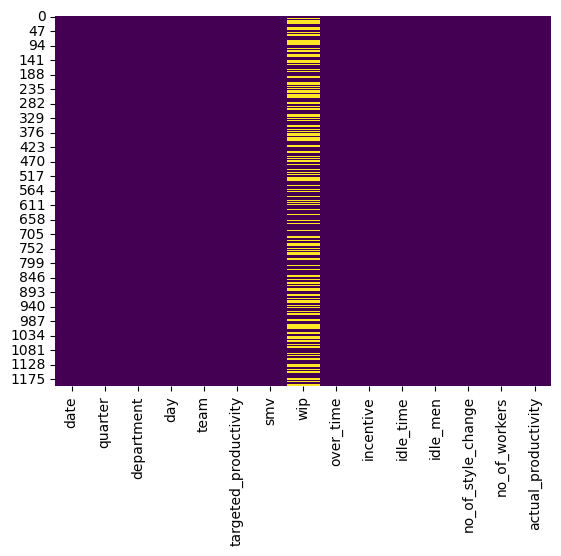

In [ ]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [ ]:
#Fill missing values for "wip" column. Fill empty 'NaN' values with 0 value to indicatee that 0 unfinished items
dataset['wip'].fillna(0, inplace=True)

#Recheck for missing values
dataset.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

<ipython-input-10-9c8e120a7d53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


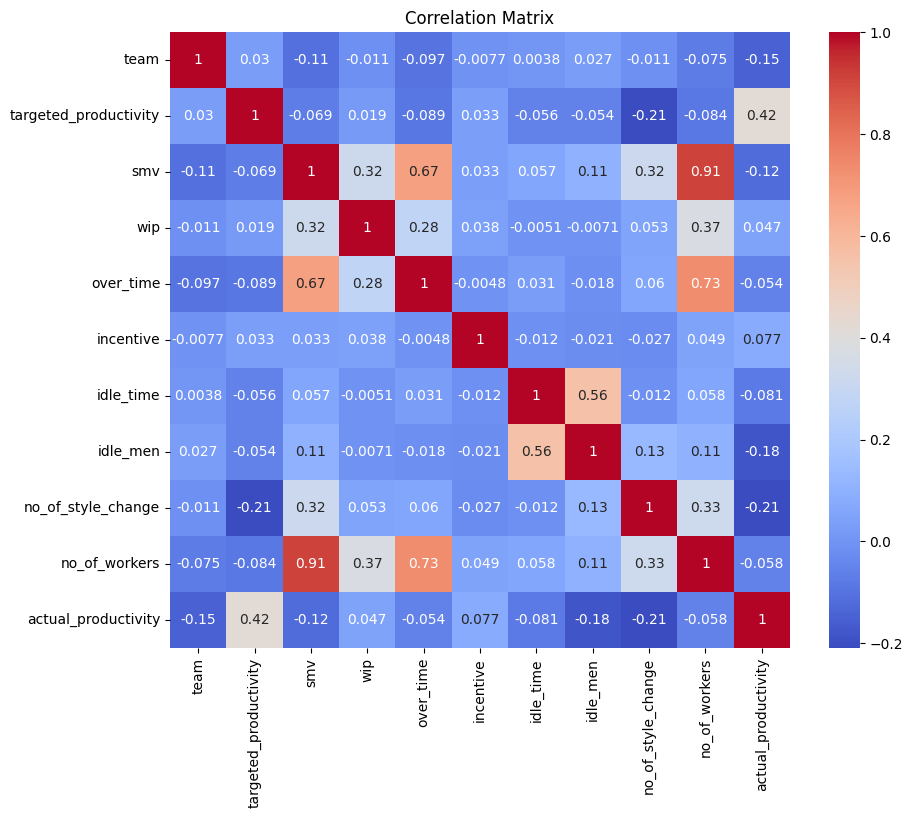

In [ ]:
# Correlation matrix before dropping features/columns
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Feature selection by dropping insignificant columns
dataset = dataset.drop(['date', 'idle_time', 'smv', 'no_of_workers'], axis=1)

#We drop the "date", "idle_time", "smv" columns because it doesn't provide any signficant value to the overall data or provides redundant data.
#"Date" records the date of the instance, but only records a span of 7-9 days between 2 months. Many other rows contain ###### values
#This also reduces the complexity of the data by reducing the number of features from 15 to 14

In [ ]:
dataset.head(10)

,quarter,department,day,team,targeted_productivity,wip,over_time,incentive,idle_men,no_of_style_change,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,1108.0,7080,98,0,0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,0.0,960,0,0,0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,968.0,3660,50,0,0,0.800570
3,Quarter1,sweing,Thursday,12,0.80,968.0,3660,50,0,0,0.800570
4,Quarter1,sweing,Thursday,6,0.80,1170.0,1920,50,0,0,0.800382
5,Quarter1,sweing,Thursday,7,0.80,984.0,6720,38,0,0,0.800125
6,Quarter1,finishing,Thursday,2,0.75,0.0,960,0,0,0,0.755167
7,Quarter1,sweing,Thursday,3,0.75,795.0,6900,45,0,0,0.753683
8,Quarter1,sweing,Thursday,2,0.75,733.0,6000,34,0,0,0.753098
9,Quarter1,sweing,Thursday,1,0.75,681.0,6900,45,0,0,0.750428


In [ ]:
#Remove outliers

# Calculate the IQR for over_time column
Q1 = dataset['over_time'].quantile(0.25)
Q3 = dataset['over_time'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outliers in the over_time column
outliers = dataset[(dataset['over_time'] < lower_limit) | (dataset['over_time'] > upper_limit)]

# Remove outliers from the over_time column
dataset = dataset[(dataset['over_time'] >= lower_limit) & (dataset['over_time'] <= upper_limit)]



In [ ]:
#Label encoding for categorical data

# Create LabelEncoder instance
le = LabelEncoder()
#Assign string values of 'day' column into integer labels. (ie. Monday = 1, Tuesday = 2, etc)
dataset['day'] = le.fit_transform(dataset['day']) + 1

#Assign string values of 'quarter' column into integer labels. (ie. Quarter1 = 1, Quarter2 = 2, etc)
dataset['quarter'] = le.fit_transform(dataset['quarter']) + 1

#Checking unique department values because we're getting 3 types of departments when we only have 2
unique_department = np.unique(dataset['department'])
print(unique_department)
#Output ['finishing' 'finishing ' 'sweing']

# Clean the values in the department column to remove any leading or trailing white spaces
dataset['department'] = dataset['department'].apply(lambda x: x.strip())

# #Assign string values of 'department' column into integer labels. (ie. finishing = 1, sweing = 2)
dataset['department'] = le.fit_transform(dataset['department']) + 1
#Recheck dataset
dataset.head(1000)

['finishing' 'finishing ' 'sweing']


,quarter,department,day,team,targeted_productivity,wip,over_time,incentive,idle_men,no_of_style_change,actual_productivity
0,1,2,4,8,0.80,1108.0,7080,98,0,0,0.940725
1,1,1,4,1,0.75,0.0,960,0,0,0,0.886500
2,1,2,4,11,0.80,968.0,3660,50,0,0,0.800570
3,1,2,4,12,0.80,968.0,3660,50,0,0,0.800570
4,1,2,4,6,0.80,1170.0,1920,50,0,0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
996,1,2,3,11,0.80,347.0,0,50,20,0,0.682433
997,1,1,3,4,0.60,0.0,960,0,0,0,0.673083
998,1,1,3,10,0.70,0.0,3360,0,0,0,0.664583
999,1,2,3,4,0.60,692.0,6840,23,0,0,0.600240


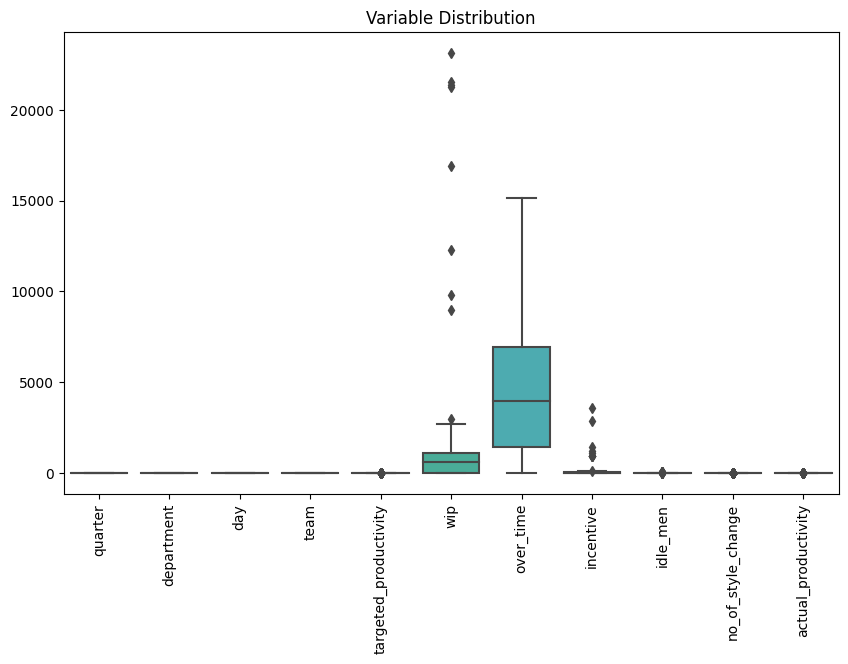

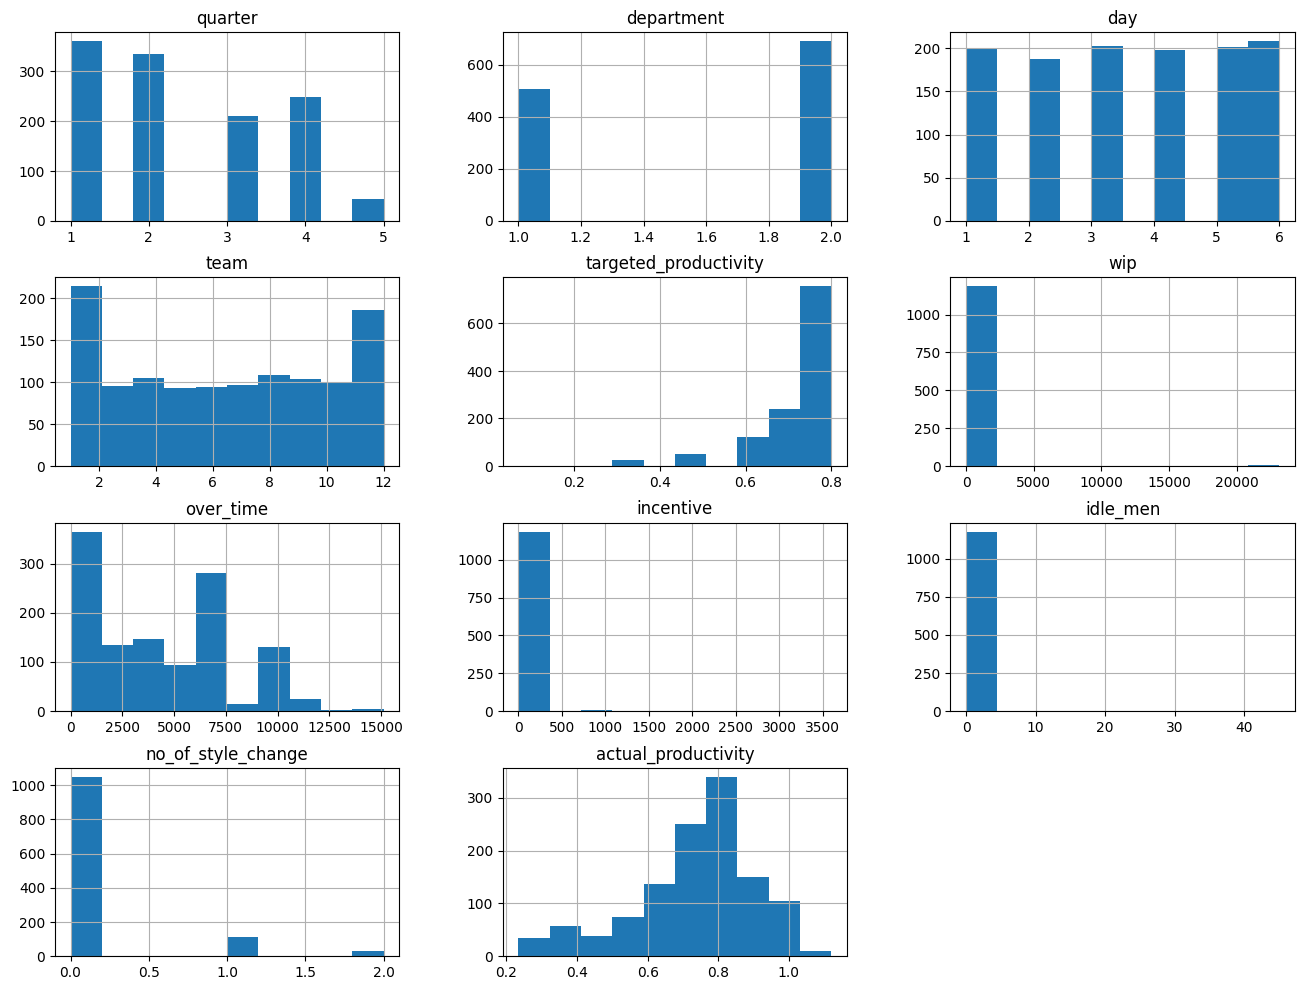

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.title("Variable Distribution")
plt.show()

# Histogram
dataset.hist(figsize=(16, 12))
plt.show()

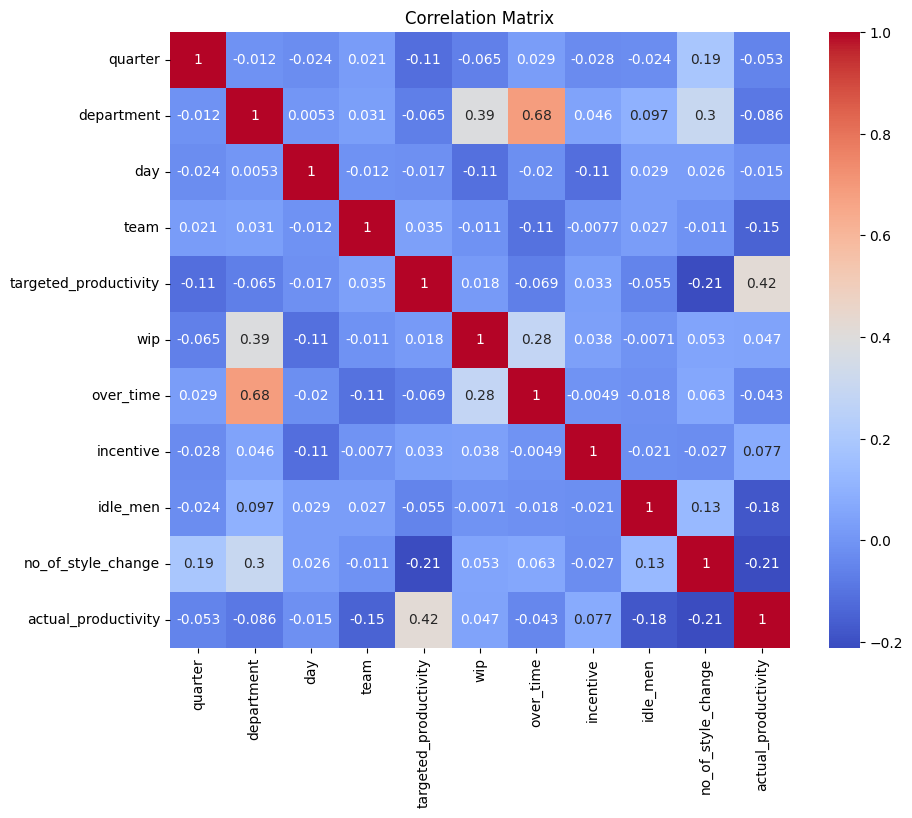

In [ ]:
# Correlation matrix
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

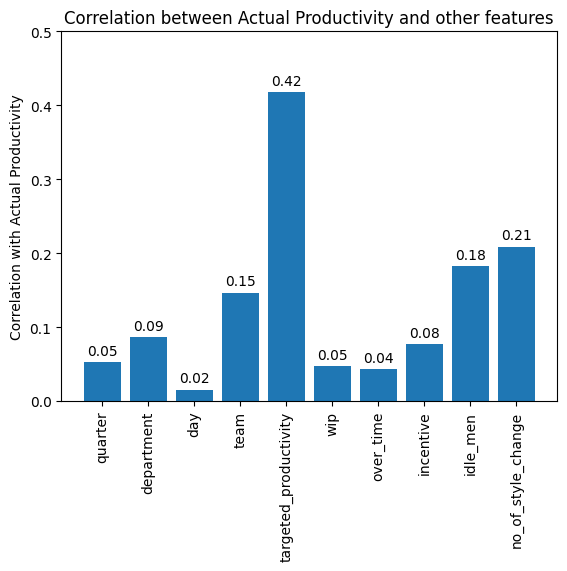

In [ ]:
#Extract the correlation values for actual_productivity onto an isolated graph for better understanding
corr_matrix = dataset.corr()
feature_correlations = corr_matrix.loc['actual_productivity', :]
feature_correlations = feature_correlations.drop('actual_productivity')
feature_correlations = feature_correlations.abs()
fig, ax = plt.subplots()
ax.bar(feature_correlations.index, feature_correlations.values)
ax.set_ylabel('Correlation with Actual Productivity')
ax.set_title("Correlation between Actual Productivity and other features")
plt.xticks(rotation=90)
ax.set_ylim(0, 0.50)

# Loop through each bar in the graph and add the correlation value to the top of the bar
for i, v in enumerate(feature_correlations.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

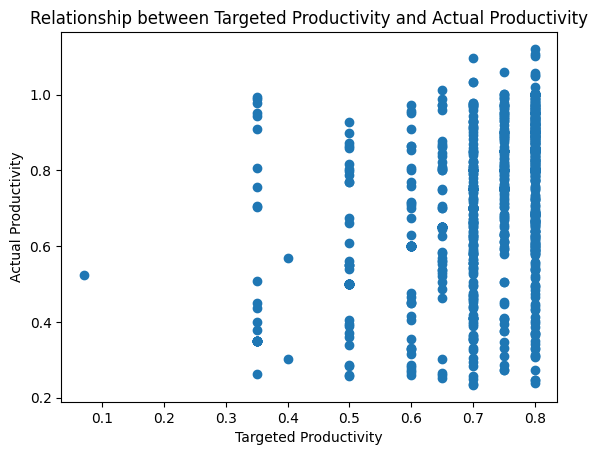

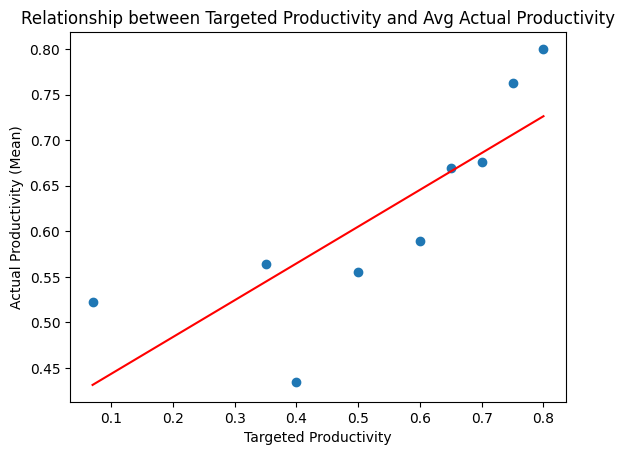

In [ ]:
# Create a scatter plot of targeted_productivity vs. actual_productivity
plt.scatter(dataset['targeted_productivity'], dataset['actual_productivity'])
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.title('Relationship between Targeted Productivity and Actual Productivity')
plt.show()

#Use Mean Actual Producitvity instead for better understanding
#=========================================================================

# Group the data by targeted productivity and compute the mean actual productivity for each group
grouped_data = dataset.groupby(['targeted_productivity']).mean()

# Create a scatter plot of the grouped data
plt.scatter(grouped_data.index, grouped_data['actual_productivity'])
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity (Mean)')
plt.title('Relationship between Targeted Productivity and Avg Actual Productivity')

# Perform linear regression on the data
x99 = grouped_data.index
y99 = grouped_data['actual_productivity']
m, b = np.polyfit(x99, y99, 1)

# Add trend line to the plot
plt.plot(x99, m*x99 + b, color='red')

plt.show()

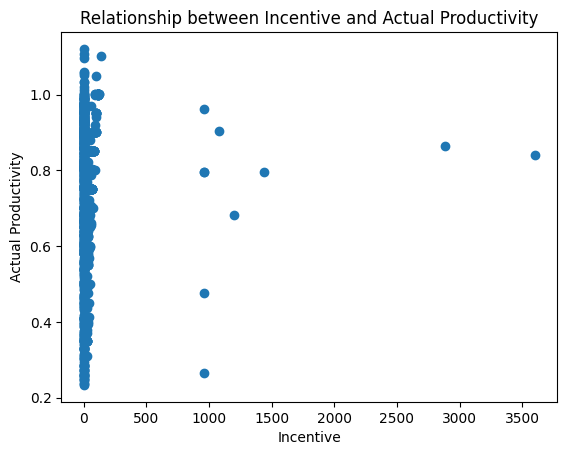

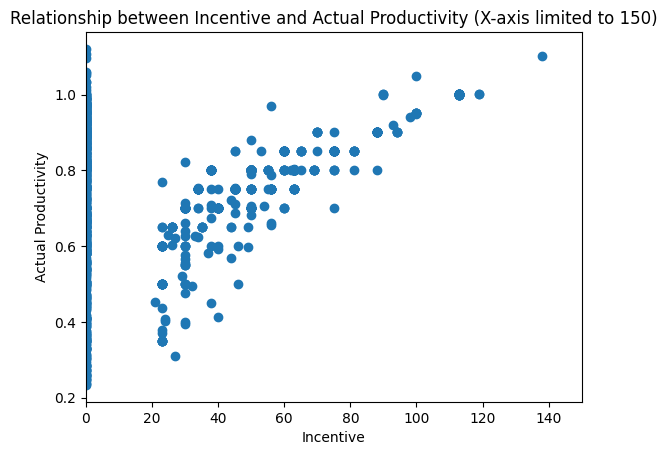

In [ ]:
# Create a scatter plot of incentive vs. actual_productivity
plt.scatter(dataset['incentive'], dataset['actual_productivity'])
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.title('Relationship between Incentive and Actual Productivity')
plt.show()

#Limit axis to 150 for incentive for better understanding
#=========================================================================

plt.scatter(dataset['incentive'], dataset['actual_productivity'])
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.title('Relationship between Incentive and Actual Productivity (X-axis limited to 150)')
plt.xlim(0, 150)
plt.show()

In [ ]:
#Separate the features and target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Used for graphing and extracing important features
X1 = dataset.iloc[:, :-1]
y1 = dataset.iloc[:, -1]

In [ ]:
#Feature Scaling

#Standarize the data features
sc = StandardScaler()
X = sc.fit_transform(X)

**Part 2**

[0.20289233 0.13679877 0.11107595 0.10573668 0.09946165 0.08963081
 0.08524074 0.07552873 0.06984236]
[0.20289233 0.3396911  0.45076706 0.55650373 0.65596539 0.7455962
 0.83083694 0.90636567 0.97620803]


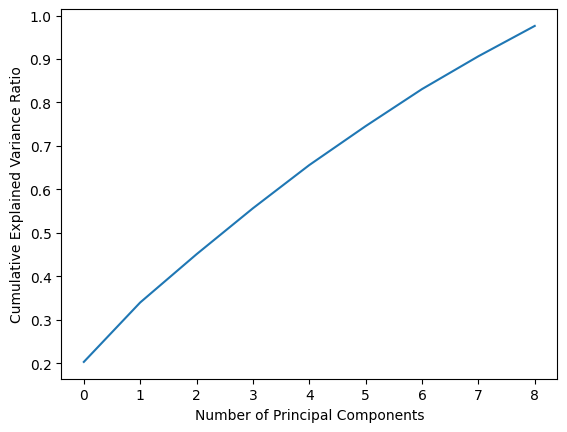

In [ ]:
#Perform PCA
n_princ_comp=9
pca = PCA(n_princ_comp)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

# Print the cumulative explained variance ratio
cum_variance_ratio = np.cumsum(variance_ratio)
print(cum_variance_ratio)


#Plot cumulative sum of the explained variance ratios to see how many principal components are needed
#Tested 5-15 for number of principal components, ended up with 9
#Use elbow method to determine at which point adding more p-components doesn't result in more explained variance
plt.plot(cum_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [ ]:
#Perform PCA with optimal number of components
n_princ_comp=9
pca = PCA(n_princ_comp)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

# Print the cumulative explained variance ratio
cum_variance_ratio = np.cumsum(variance_ratio)
print(cum_variance_ratio)

'''
print('test')
print(X_pca)
'''

[0.20289233 0.13679877 0.11107595 0.10573668 0.09946165 0.08963081
 0.08524074 0.07552873 0.06984236]
[0.20289233 0.3396911  0.45076706 0.55650373 0.65596539 0.7455962
 0.83083694 0.90636567 0.97620803]


"\nprint('test')\nprint(X_pca)\n"

In [ ]:
#Split data for Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Make sure size of datasets are the same sizes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#print(X_test[0])

(956, 9)
(240, 9)
(956,)
(240,)


# Part 3

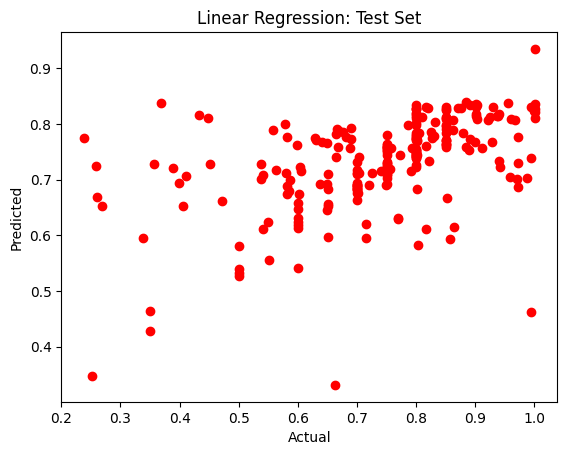

In [ ]:
#Linear Regression

#Create a linear regression instance
lin_reg = LinearRegression()
#Train the model on the training data we split eariler
lin_reg.fit(X_train, y_train)


#Test the model
lin_reg_y_prediction = lin_reg.predict(X_test)

'''
print('X_test')
print(X_test)
print('lin_reg_y_prediction')
print(lin_reg_y_prediction)
'''

#Performance metrics
lin_reg_r2 = r2_score(y_test, lin_reg_y_prediction)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_y_prediction)
lin_reg_mse = mean_squared_error(y_test, lin_reg_y_prediction)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_mape = mean_absolute_percentage_error(y_test, lin_reg_y_prediction)

#TODO: MASE, R2-adjusted

#Not sure what and how to plot data points for the respective regression models - could change
#Visualising the Test set results
plt.scatter(y_test, lin_reg_y_prediction, color = 'red')
plt.title('Linear Regression: Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


[0.6264342  0.65031656 0.67419893 0.69808129 0.72196366 0.74584602
 0.76972838 0.79361075 0.81749311 0.84137548]


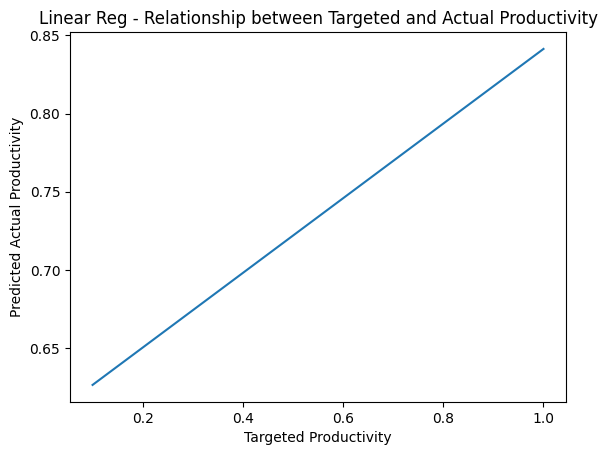

[0.7245443  0.72716525 0.7297862  0.73240715 0.7350281  0.73764905
 0.75075381]


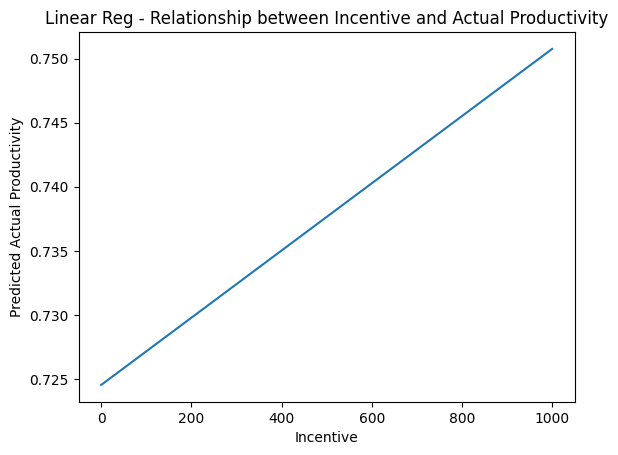

In [ ]:
#Test a new custom data inputs against Linear Regression Model to validate claims that _ features has a positive/negative relationship with actual_productivity (answering #4)

#Test increasing targeted_productivity
new_data = [[1, 2, 4, 8, 0.10, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.20, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.30, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.40, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.50, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.60, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.70, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.80, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.90, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 1.00, 1108, 7080, 98, 0, 0]]
new_data_sc = sc.fit_transform(new_data)
new_data_sc_pca = pca.transform(new_data_sc)
predicted_values = lin_reg.predict(new_data_sc_pca)
print(predicted_values)

# plot the predicted values against the increasing targeted productivity
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], predicted_values)
# set the x and y labels
plt.xlabel('Targeted Productivity')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('Linear Reg - Relationship between Targeted and Actual Productivity')
# show the plot
plt.show()

#Test increasing incentive
new_data = [[1, 2, 4, 8, 0.80, 1108, 7080, 0, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 100, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 200, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 300, 0, 0],[1, 2, 4, 8, 0.80, 1108, 7080, 400, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 500, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 1000, 0, 0]]
new_data_sc = sc.fit_transform(new_data)
new_data_sc_pca = pca.transform(new_data_sc)
predicted_values = lin_reg.predict(new_data_sc_pca)
print(predicted_values)

# plot the predicted values against the increasing incentive
plt.plot([0, 100, 200, 300, 400, 500, 1000], predicted_values)
# set the x and y labels
plt.xlabel('Incentive')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('Linear Reg - Relationship between Incentive and Actual Productivity')
# show the plot
plt.show()

department          : 0.051879
over_time           : -0.050815
team                : -0.023731
incentive           : 0.020491
quarter             : -0.015666
targeted_productivity: -0.008102
wip                 : 0.006603
idle_men            : -0.002457
day                 : -0.001012


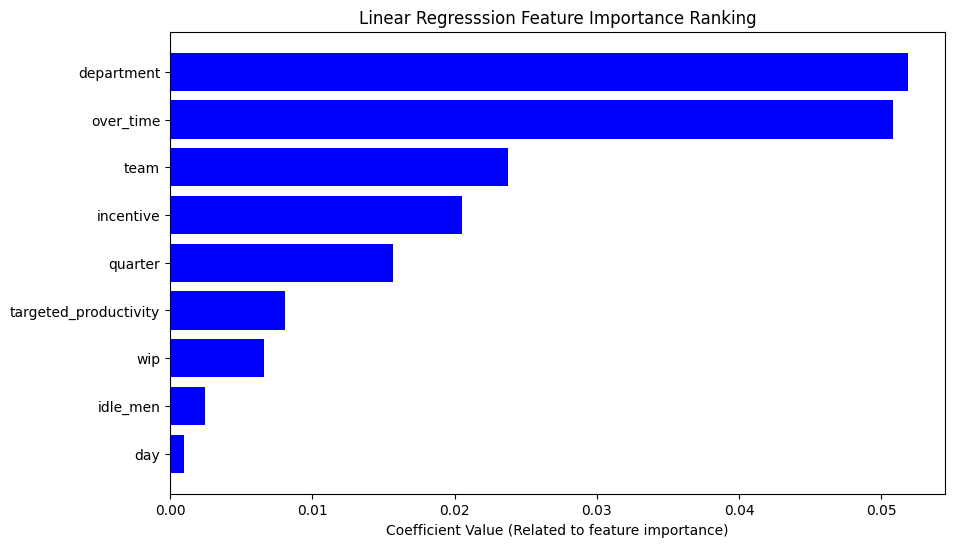

In [ ]:
 #Get important features for Linear Regression model

# Get the coefficients of the model
coefs = lin_reg.coef_

# Get the indices of the sorted coefficients in descending order
sorted_idx = np.argsort(np.abs(coefs))[::-1]

# Print the feature importance ranking
for i in sorted_idx:
    print("{:20s}: {:.6f}".format(X1.columns[i], coefs[i]))

#Graphing results
#===========================================================

# Create a list of feature names in descending order of importance
feature_names = [X1.columns[i] for i in sorted_idx][::-1]

# Create a list of coefficients in descending order of importance
feature_coefs = [np.abs(coefs[i]) for i in sorted_idx][::-1]

# Create a bar graph of feature importance
plt.figure(figsize=(10,6))
bars = plt.barh(range(len(feature_coefs)), feature_coefs, color='b')

plt.yticks(range(len(feature_coefs)), feature_names)
plt.xlabel("Coefficient Value (Related to feature importance)")
plt.title("Linear Regresssion Feature Importance Ranking")

plt.show()

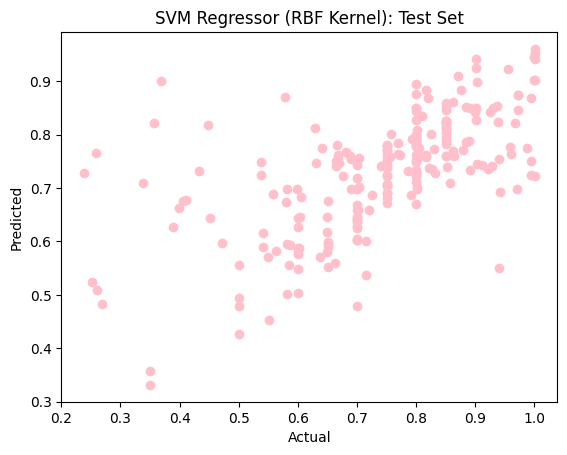

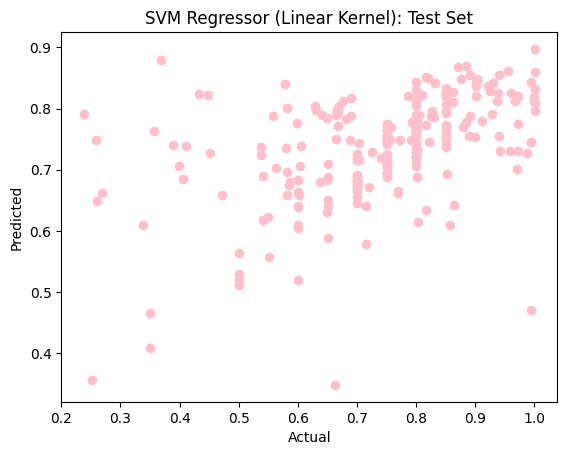

In [ ]:
#SVM Regressor

#Create a SVM Regressor instance
svm_reg = SVR()
#Train the model on the training data we split eariler
svm_reg.fit(X_train, y_train)
#Test the model
svm_reg_y_prediction = svm_reg.predict(X_test)

#Performance metrics
svm_reg_r2 = r2_score(y_test, svm_reg_y_prediction)
svm_reg_mae = mean_absolute_error(y_test, svm_reg_y_prediction)
svm_reg_mse = mean_squared_error(y_test, svm_reg_y_prediction)
svm_reg_rmse = np.sqrt(svm_reg_mse)
svm_reg_mape = mean_absolute_percentage_error(y_test, svm_reg_y_prediction)

#Not sure what and how to plot data points for the respective regression models - could change
#Visualising the Test set results
plt.scatter(y_test, svm_reg_y_prediction, color = 'pink')
plt.title('SVM Regressor (RBF Kernel): Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#Create a SVM Regressor instance (Linear Kernel)
svm_reg1 = SVR(kernel='linear')
#Train the model on the training data we split eariler
svm_reg1.fit(X_train, y_train)
#Test the model
svm_reg1_y_prediction = svm_reg1.predict(X_test)

#Performance metrics
svm_reg1_r2 = r2_score(y_test, svm_reg1_y_prediction)
svm_reg1_mae = mean_absolute_error(y_test, svm_reg1_y_prediction)
svm_reg1_mse = mean_squared_error(y_test, svm_reg1_y_prediction)
svm_reg1_rmse = np.sqrt(svm_reg1_mse)
svm_reg1_mape = mean_absolute_percentage_error(y_test, svm_reg1_y_prediction)

#Not sure what and how to plot data points for the respective regression models - could change
#Visualising the Test set results
plt.scatter(y_test, svm_reg1_y_prediction, color = 'pink')
plt.title('SVM Regressor (Linear Kernel): Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


[0.58578934 0.6090743  0.63439622 0.65999952 0.68416739 0.70539329
 0.72251948 0.7348271  0.74206966 0.74444989]
[0.62953216 0.65391292 0.67829368 0.70267444 0.7270552  0.75143597
 0.77581673 0.80019749 0.82457825 0.84895901]


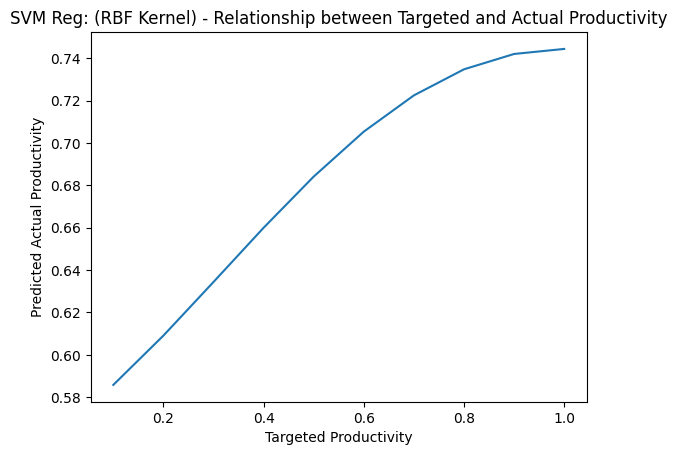

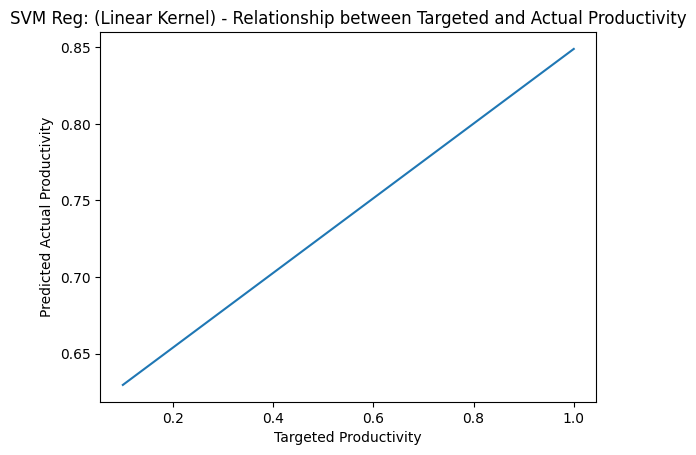

[0.34885186 0.42865104 0.52473935 0.63171933 0.74298458 0.85137327
 1.14897844]
[0.72982876 0.73246547 0.73510218 0.73773889 0.7403756  0.74301231
 0.75619586]


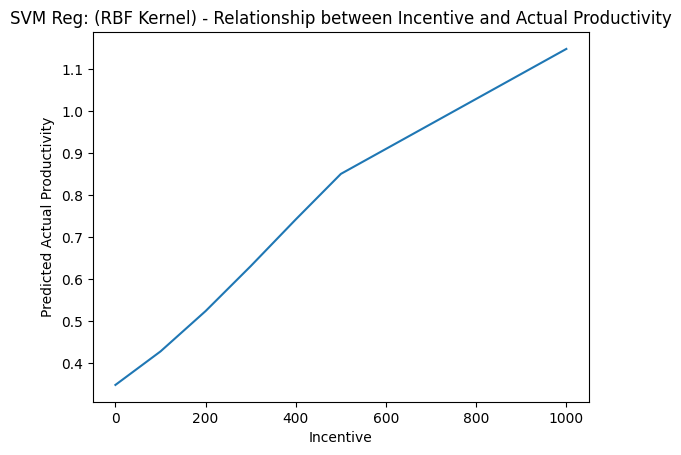

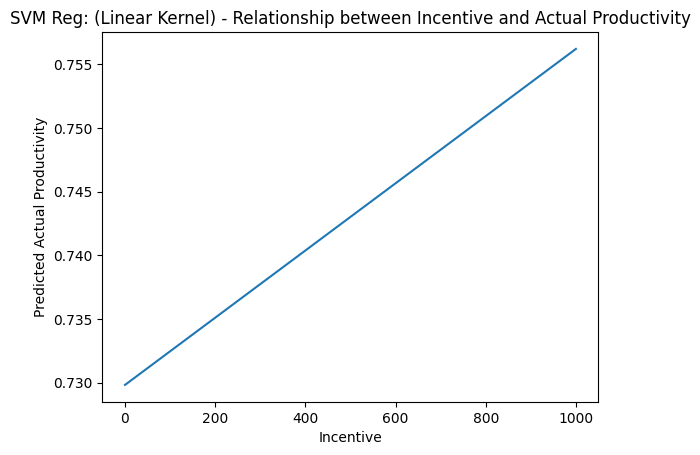

In [ ]:
#Test a new custom data inputs against SVM (RBF Kernel and Linear) Regressor Model to validate claims that _ features has a positive/negative relationship with actual_productivity (answering #4)

#Test increasing targeted_productivity
new_data = [[1, 2, 4, 8, 0.10, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.20, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.30, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.40, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.50, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.60, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.70, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.80, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.90, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 1.00, 1108, 7080, 98, 0, 0]]
new_data_sc = sc.fit_transform(new_data)
new_data_sc_pca = pca.transform(new_data_sc)
predicted_values = svm_reg.predict(new_data_sc_pca)
predicted_values1 = svm_reg1.predict(new_data_sc_pca)
print(predicted_values)
print(predicted_values1)

# plot the predicted values against the increasing targeted productivity
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], predicted_values)
# set the x and y labels
plt.xlabel('Targeted Productivity')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('SVM Reg: (RBF Kernel) - Relationship between Targeted and Actual Productivity')
# show the plot
plt.show()

# plot the predicted values against the increasing targeted productivity
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], predicted_values1)
# set the x and y labels
plt.xlabel('Targeted Productivity')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('SVM Reg: (Linear Kernel) - Relationship between Targeted and Actual Productivity')
# show the plot
plt.show()


#Test increasing incentive
new_data = [[1, 2, 4, 8, 0.80, 1108, 7080, 0, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 100, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 200, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 300, 0, 0],[1, 2, 4, 8, 0.80, 1108, 7080, 400, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 500, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 1000, 0, 0]]
new_data_sc = sc.fit_transform(new_data)
new_data_sc_pca = pca.transform(new_data_sc)
predicted_values = svm_reg.predict(new_data_sc_pca)
predicted_values1 = svm_reg1.predict(new_data_sc_pca)
print(predicted_values)
print(predicted_values1)

# plot the predicted values against the increasing incentive
plt.plot([0, 100, 200, 300, 400, 500, 1000], predicted_values)
# set the x and y labels
plt.xlabel('Incentive')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('SVM Reg: (RBF Kernel) - Relationship between Incentive and Actual Productivity')
# show the plot
plt.show()

plt.plot([0, 100, 200, 300, 400, 500, 1000], predicted_values1)
# set the x and y labels
plt.xlabel('Incentive')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('SVM Reg: (Linear Kernel) - Relationship between Incentive and Actual Productivity')
# show the plot
plt.show()


department: 0.833748
wip: 0.714245
day: 0.574413
quarter: 0.357412
targeted_productivity: 0.266475
over_time: 0.130865
team: 0.095908
idle_men: 0.095754
incentive: 0.083543
department: 0.226850
over_time: 0.163229
quarter: 0.049722
team: 0.040269
incentive: 0.013878
wip: 0.002484
targeted_productivity: 0.001915
idle_men: 0.000057
day: -0.000969


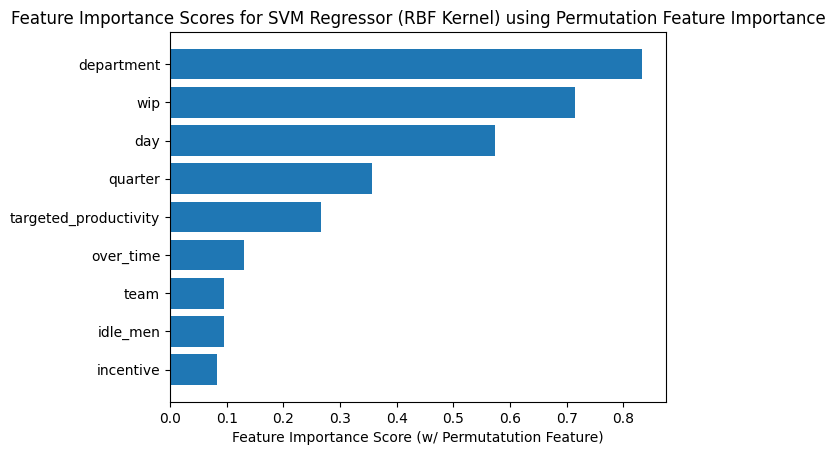

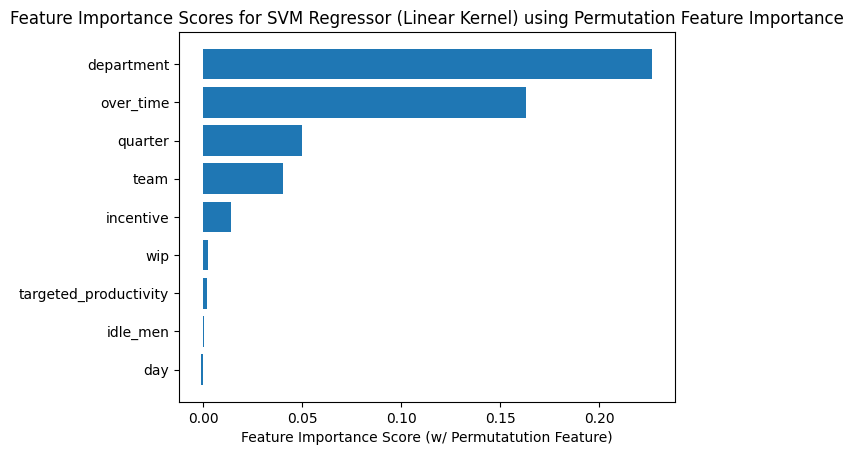

In [ ]:
#Get important features for SVM Regressor (RBF Kernel) - using permutation feature
#Randomly shuffles values of a feature and checks if model performance decreases, if larger decrease then the feature is more important

# Calculate baseline performance of the model on a validation set
baseline_score = svm_reg.score(X_pca, y)
baseline_score1 = svm_reg1.score(X_pca, y)

# Compute feature importance scores using permutation feature importance
result = permutation_importance(svm_reg, X_pca, y, n_repeats=10)
result1 = permutation_importance(svm_reg1, X_pca, y, n_repeats=10)

# Get the importance scores and feature names
importance_scores = result.importances_mean
feature_names = X1.columns
importance_scores1 = result1.importances_mean

# Rank the features based on their importance scores
ranked_features = sorted(zip(importance_scores, feature_names), reverse=True)
ranked_features1 = sorted(zip(importance_scores1, feature_names), reverse=True)

# Print the ranked features and their importance scores
for i, (score, name) in enumerate(ranked_features):
    print(f"{name}: {score:.6f}")

for i, (score, name) in enumerate(ranked_features1):
  print(f"{name}: {score:.6f}")

#Graphing results
#===========================================================

# Get the feature names and their importance scores
feature_names = [name for score, name in ranked_features]
feature_scores = [score for score, name in ranked_features]
feature_names1 = [name for score, name in ranked_features1]
feature_scores1 = [score for score, name in ranked_features1]

# Plot the bar graph
fig, ax = plt.subplots()
ax.barh(range(len(feature_names)), feature_scores, align='center')
ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance Score (w/ Permutatution Feature)')
ax.set_title('Feature Importance Scores for SVM Regressor (RBF Kernel) using Permutation Feature Importance')
plt.show()

fig, ax = plt.subplots()
ax.barh(range(len(feature_names1)), feature_scores1, align='center')
ax.set_yticks(range(len(feature_names1)))
ax.set_yticklabels(feature_names1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance Score (w/ Permutatution Feature)')
ax.set_title('Feature Importance Scores for SVM Regressor (Linear Kernel) using Permutation Feature Importance')
plt.show()


department 0.136657607027645
over_time 0.12893893951802204
quarter 0.12683662512843086
day 0.12440760748906211
team 0.11862547140328707
targeted_productivity 0.10844329589793855
no_of_style_change 0.08044027448379205
wip 0.07245758831342503
incentive 0.055509821618858174
idle_men 0.04768276911953903
department 0.13828008778672232
over_time 0.13450736654385137
quarter 0.13428513443556475
day 0.12115380023957405
team 0.1231710913636255
targeted_productivity 0.11448410969208839
no_of_style_change 0.07883924609166806
wip 0.06804401680340169
incentive 0.0544627579735218
idle_men 0.03277238906998209


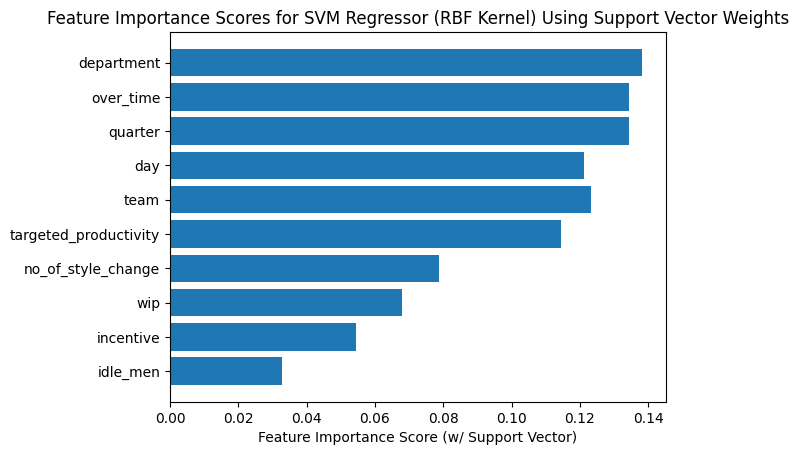

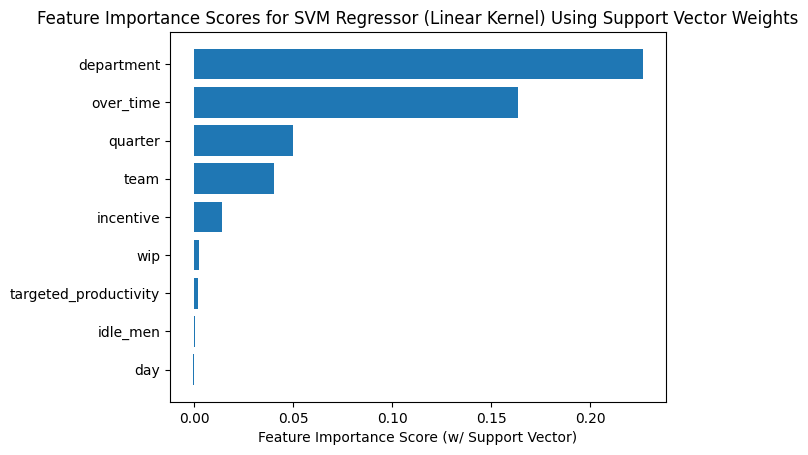

In [ ]:
#Get important features for SVM Regressor (RBF Kernel) - using support vector weights
#Finds hyperplane that separates the different classees with the most margin, support vectors are closest to the hyperplane and are important data points
#Importance measured by how much the support vectors contribute to the margin, any features that contribute most to the weights of the support vector are more important

#Get the support vectors
support_vectors = svm_reg.support_vectors_
support_vectors1 = svm_reg1.support_vectors_

#Project the support vectors back into the original feature space
inv_transformed_sv = pca.inverse_transform(support_vectors)
inv_transformed_sv1 = pca.inverse_transform(support_vectors1)

#Calculate feature importance scores
feature_importances = np.abs(inv_transformed_sv).sum(axis=0)
feature_importances /= feature_importances.sum()
feature_importances1 = np.abs(inv_transformed_sv1).sum(axis=0)
feature_importances1 /= feature_importances1.sum()

#Get the indices that sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_indices1 = np.argsort(feature_importances1)[::-1]

#Print the feature importances in descending order
for i in sorted_indices:
    print(f"{X1.columns[i]} {feature_importances[i]}")
for i in sorted_indices:
  print(f"{X1.columns[i]} {feature_importances1[i]}")

#Graphing results
#===========================================================

# Get the feature names and their importance scores
feature_names = X1.columns[sorted_indices]
feature_scores = feature_importances[sorted_indices]

feature_names = X1.columns[sorted_indices]
feature_scores = feature_importances1[sorted_indices]

# Plot the bar graph
fig, ax = plt.subplots()
ax.barh(range(len(feature_names)), feature_scores, align='center')
ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance Score (w/ Support Vector)')
ax.set_title('Feature Importance Scores for SVM Regressor (RBF Kernel) Using Support Vector Weights')
plt.show()


# Plot the bar graph
fig, ax = plt.subplots()
ax.barh(range(len(feature_names1)), feature_scores1, align='center')
ax.set_yticks(range(len(feature_names1)))
ax.set_yticklabels(feature_names1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance Score (w/ Support Vector)')
ax.set_title('Feature Importance Scores for SVM Regressor (Linear Kernel) Using Support Vector Weights')
plt.show()

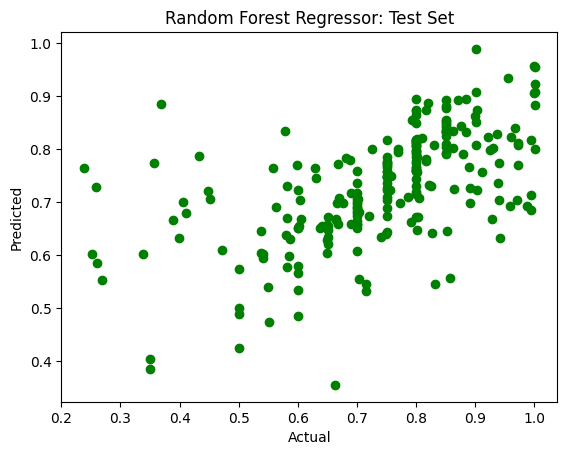

In [ ]:
#Random Forest Regressor

#Create a Random Forest Regressor instance
rf_reg= RandomForestRegressor()
#Train the model on the training data we split eariler
rf_reg.fit(X_train, y_train)
#Test the model
rf_reg_y_prediction = rf_reg.predict(X_test)

#Performance metrics
rf_reg_r2 = r2_score(y_test, rf_reg_y_prediction)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_y_prediction)
rf_reg_mse = mean_squared_error(y_test, rf_reg_y_prediction)
rf_reg_rmse = np.sqrt(rf_reg_mse)
rf_reg_mape = mean_absolute_percentage_error(y_test, rf_reg_y_prediction)

#Not sure what and how to plot data points for the respective regression models - could change
#Visualising the Test set results
plt.scatter(y_test, rf_reg_y_prediction, color = ['green'])
plt.title('Random Forest Regressor: Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

[0.59870977 0.59574102 0.59353243 0.65331841 0.73412808 0.73691498
 0.73609252 0.73309681 0.74121492 0.75524754]


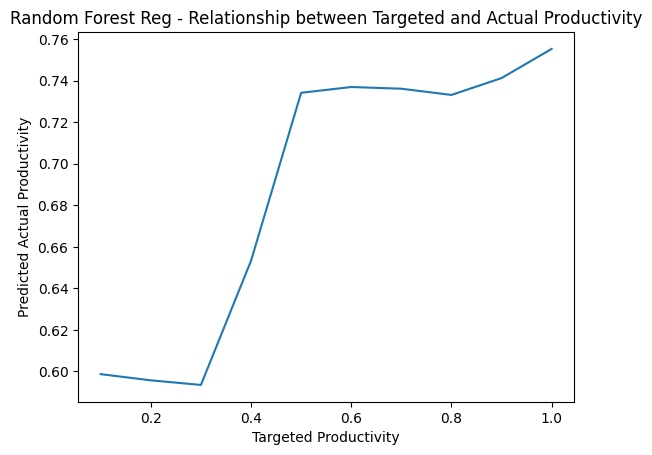

[0.68037957 0.70520704 0.7008374  0.72486787 0.72372213 0.7322827
 0.76631002]


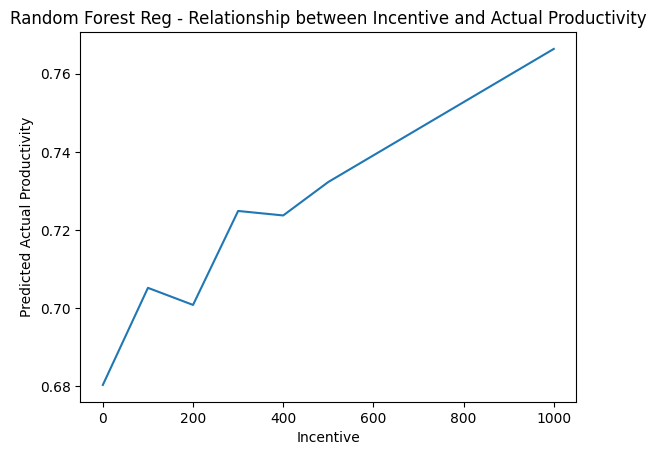

In [ ]:
#Test a new custom data inputs against Random Forest Model to validate claims that _ features has a positive/negative relationship with actual_productivity (answering #4)

#Test increasing targeted_productivity
new_data = [[1, 2, 4, 8, 0.10, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.20, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.30, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.40, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.50, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.60, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.70, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.80, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 0.90, 1108, 7080, 98, 0, 0],[1, 2, 4, 8, 1.00, 1108, 7080, 98, 0, 0]]
new_data_sc = sc.fit_transform(new_data)
new_data_sc_pca = pca.transform(new_data_sc)
predicted_values = rf_reg.predict(new_data_sc_pca)
print(predicted_values)

# plot the predicted values against the increasing targeted productivity
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], predicted_values)
# set the x and y labels
plt.xlabel('Targeted Productivity')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('Random Forest Reg - Relationship between Targeted and Actual Productivity')
# show the plot
plt.show()

#Test increasing incentive
new_data = [[1, 2, 4, 8, 0.80, 1108, 7080, 0, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 100, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 200, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 300, 0, 0],[1, 2, 4, 8, 0.80, 1108, 7080, 400, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 500, 0, 0], [1, 2, 4, 8, 0.80, 1108, 7080, 1000, 0, 0]]
new_data_sc = sc.fit_transform(new_data)
new_data_sc_pca = pca.transform(new_data_sc)
predicted_values = rf_reg.predict(new_data_sc_pca)
print(predicted_values)

# plot the predicted values against the increasing incentive
plt.plot([0, 100, 200, 300, 400, 500, 1000], predicted_values)
# set the x and y labels
plt.xlabel('Incentive')
plt.ylabel('Predicted Actual Productivity')
# set the plot title
plt.title('Random Forest Reg - Relationship between Incentive and Actual Productivity')
# show the plot
plt.show()

over_time                     : 0.2130
department                    : 0.1773
quarter                       : 0.1200
targeted_productivity         : 0.0974
team                          : 0.0935
incentive                     : 0.0918
idle_men                      : 0.0784
day                           : 0.0651
wip                           : 0.0635


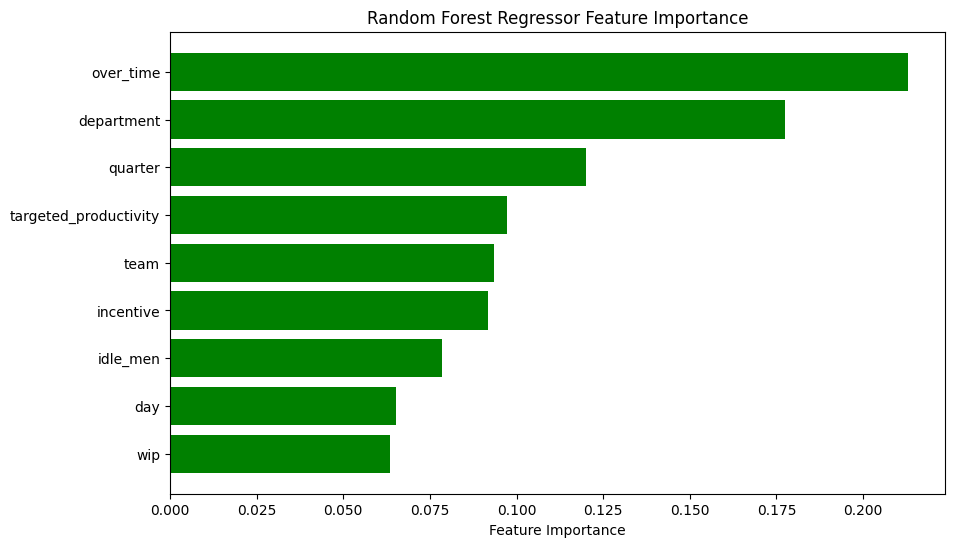

In [ ]:
#Get important features for Random Forest Regressor

# Reverse the PCA transformation to get the original feature space
X_reversed = pca.inverse_transform(X_pca)

# Reverse the feature scaling using the StandardScaler object
X_unscaled = sc.inverse_transform(X_reversed)

# Get the feature importances from the trained Random Forest Regressor
importances = rf_reg.feature_importances_

# Map the feature importances to the feature names
feature_names = list(X1.columns)
feature_importances = dict(zip(feature_names, importances))

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_importances:
    print("{:<30s}: {:.4f}".format(feature, importance))

#===========================================================

# Create lists of feature names and their importances
feature_names = [f[0] for f in sorted_importances][::-1]
importances = [f[1] for f in sorted_importances][::-1]

# Create a bar graph of feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(feature_names)), importances, color='g')

plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Random Forest Regressor Feature Importance")

plt.show()

In [ ]:
print("Linear Regression MAE: {:.4f}, MSE: {:.4f}, RMSE:{:.4f}, R2: {:.4f}, MAPE: {:.4f}".format(lin_reg_mae, lin_reg_mse,lin_reg_rmse, lin_reg_r2, lin_reg_mape))
print("SVM Regressor MAE: {:.4f}, MSE: {:.4f}, RMSE:{:.4f}, R2: {:.4f}, MAPE: {:.4f}".format(svm_reg_mae, svm_reg_mse, svm_reg_rmse, svm_reg_r2, svm_reg_mape))
print("Random Forest Regressor MAE: {:.4f}, MSE: {:.4f}, RMSE:{:.4f}, R2: {:.4f}, MAPE: {:.4f}".format(rf_reg_mae, rf_reg_mse, rf_reg_rmse, rf_reg_r2, rf_reg_mape))

Linear Regression MAE: 0.0961, MSE: 0.0192, RMSE:0.1387, R2: 0.2526, MAPE: 0.1637
SVM Regressor MAE: 0.0851, MSE: 0.0157, RMSE:0.1252, R2: 0.3914, MAPE: 0.1475
Random Forest Regressor MAE: 0.0876, MSE: 0.0173, RMSE:0.1316, R2: 0.3270, MAPE: 0.1514


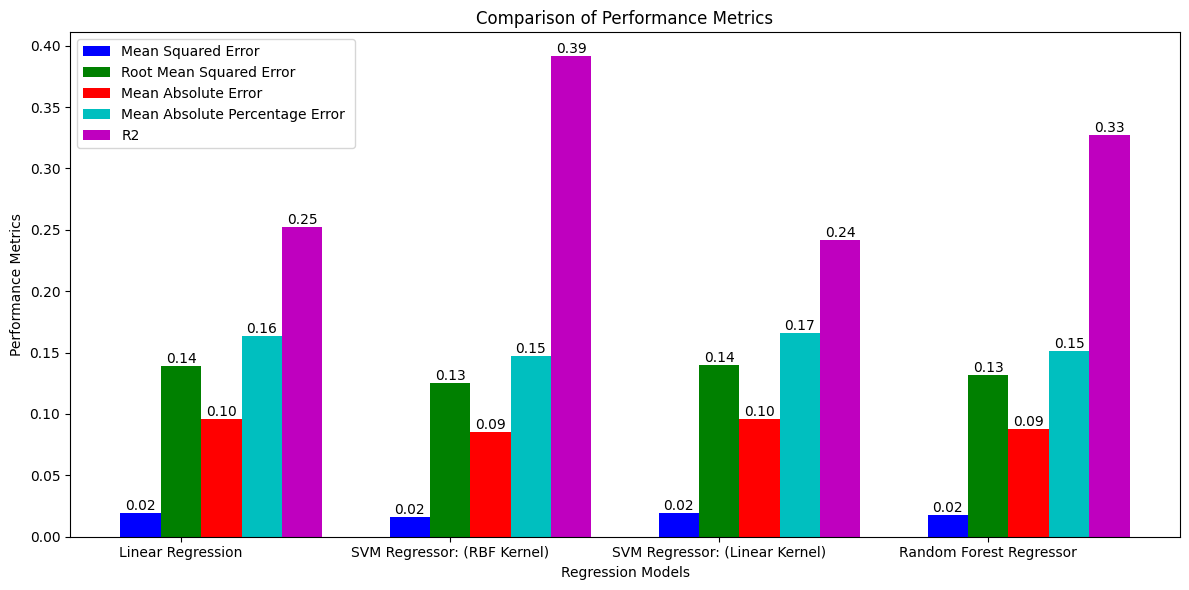

In [ ]:
#Compare the performance metrics of the 3 regression models

models = ['Linear Regression', 'SVM Regressor: (RBF Kernel)', 'SVM Regressor: (Linear Kernel)', 'Random Forest Regressor']
mse = [lin_reg_mse, svm_reg_mse, svm_reg1_mse, rf_reg_mse]
rmse = [lin_reg_rmse, svm_reg_rmse, svm_reg1_rmse, rf_reg_rmse]
mae = [lin_reg_mae, svm_reg_mae, svm_reg1_mae, rf_reg_mae]
mape = [lin_reg_mape, svm_reg_mape, svm_reg1_mape, rf_reg_mape]
r2 = [lin_reg_r2, svm_reg_r2, svm_reg1_r2, rf_reg_r2]

fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(models))
bar_width = 0.15

rects1 = ax.bar(index, mse, bar_width, color='b', label='Mean Squared Error')
rects2 = ax.bar(index + bar_width, rmse, bar_width, color='g', label='Root Mean Squared Error')
rects3 = ax.bar(index + 2*bar_width, mae, bar_width, color='r', label='Mean Absolute Error')
rects4 = ax.bar(index + 3*bar_width, mape, bar_width, color ='c', label="Mean Absolute Percentage Error ")
rects5 = ax.bar(index + 4*bar_width, r2, bar_width, color='m', label="R2")

ax.set_xlabel('Regression Models')
ax.set_ylabel('Performance Metrics')
ax.set_title('Comparison of Performance Metrics')
ax.set_xticks(index+ bar_width)
ax.set_xticklabels(models)
ax.legend()

for i, rect in enumerate(rects1+rects2+rects3+rects4+rects5):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.2f' % float([mse,rmse,mae,mape,r2][i//4][i%4]), ha='center', va='bottom')

plt.tight_layout()
plt.show()